[*********************100%***********************]  38 of 38 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


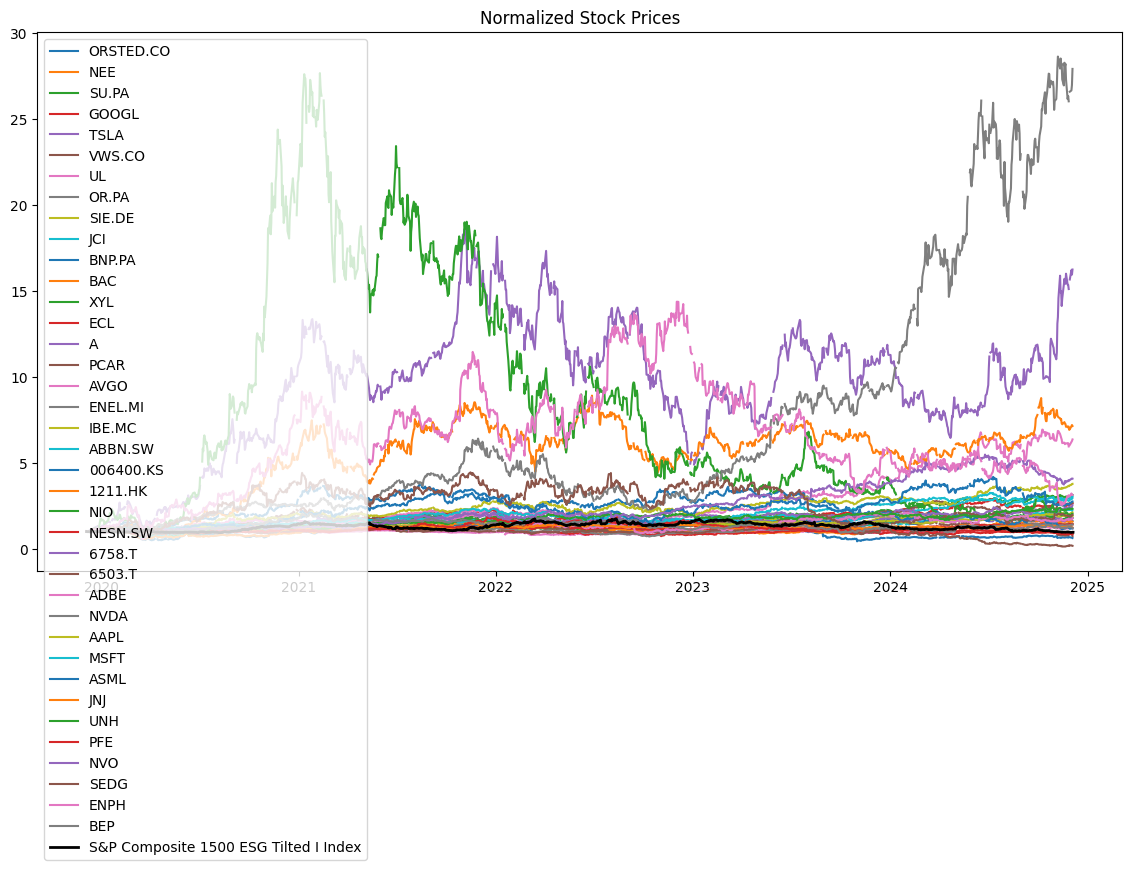

<ipython-input-7-bc661ba12dc3>:57: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  daily_returns = stock_data.pct_change().fillna(method='ffill').dropna()
<ipython-input-7-bc661ba12dc3>:57: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  daily_returns = stock_data.pct_change().fillna(method='ffill').dropna()
<ipython-input-7-bc661ba12dc3>:58: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  benchmark_returns = benchmark_data.pct_change().fillna(method='ffill').dropna()
<ipython-input-7-bc661ba12dc3>:59: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() 

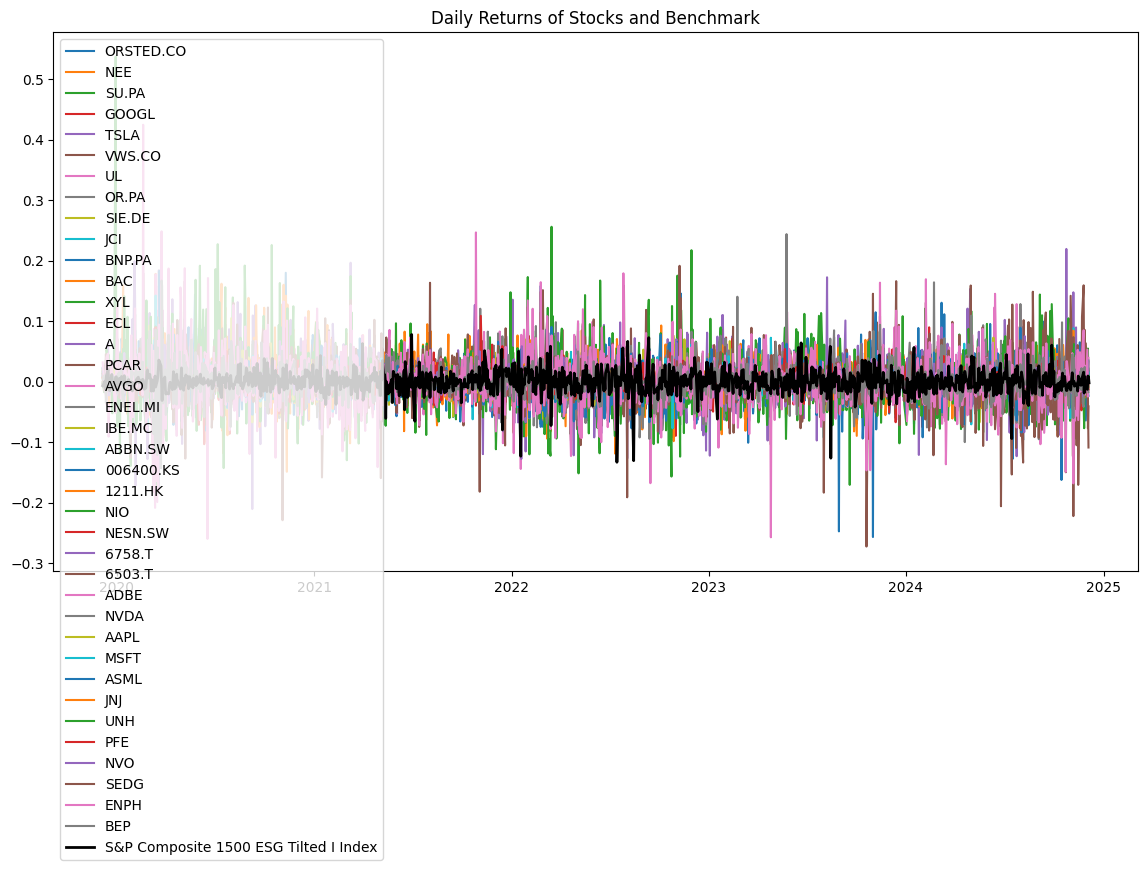

Optimization terminated successfully    (Exit mode 0)
            Current function value: -2.811595012403153
            Iterations: 22
            Function evaluations: 866
            Gradient evaluations: 22
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4.02507636199586
            Iterations: 21
            Function evaluations: 819
            Gradient evaluations: 21


<ipython-input-7-bc661ba12dc3>:124: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  results[2, i] = (returns - float(risk_free_rate)) / risk
<ipython-input-7-bc661ba12dc3>:134: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  cml_y = float(riskfree_returns.mean()) + (sr_max_ret - float(riskfree_returns.mean())) / sr_max_risk * cml_x


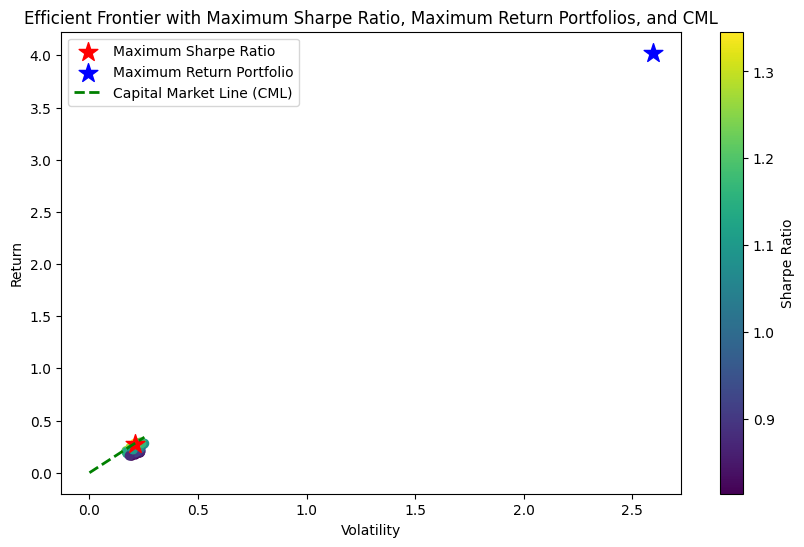

Optimal Portfolio Weights based on Sharpe Ratio:
ORSTED.CO   -0.014214
NEE          0.182894
SU.PA        0.121181
GOOGL        0.134485
TSLA        -0.005586
VWS.CO       0.140086
UL           0.366661
OR.PA       -0.350638
SIE.DE      -0.322760
JCI          0.158836
BNP.PA      -0.161323
BAC         -0.186192
XYL         -0.024534
ECL         -0.232386
A           -0.154907
PCAR         0.231228
AVGO         0.020387
ENEL.MI      0.555933
IBE.MC       0.088965
ABBN.SW      0.206530
006400.KS   -0.007856
1211.HK      0.131809
NIO         -0.500000
NESN.SW      0.003498
6758.T       0.420222
6503.T       0.400596
ADBE         0.034939
NVDA        -0.074401
AAPL         0.272857
MSFT        -0.123349
ASML        -0.306199
JNJ         -0.092499
UNH          0.187340
PFE          0.133000
NVO         -0.104051
SEDG         0.103346
ENPH        -0.103908
BEP         -0.129990
dtype: float64

Optimal Portfolio Weights for Maximum Return:
ORSTED.CO   -0.500000
NEE          1.000000
SU.PA    

<ipython-input-7-bc661ba12dc3>:165: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  portfolio_sharpe_ratio = float((portfolio_return - riskfree_returns.mean()) / portfolio_volatility)
<ipython-input-7-bc661ba12dc3>:174: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  max_return_sharpe_ratio = float((max_return_portfolio_return - riskfree_returns.mean()) / max_return_portfolio_volatility)


In [7]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from datetime import datetime

# Define stock tickers and benchmark
stocks = ['ORSTED.CO', 'NEE', 'SU.PA', 'GOOGL', 'TSLA', 'VWS.CO',
          'UL', 'OR.PA', 'SIE.DE', 'JCI', 'BNP.PA', 'BAC',
          'XYL', 'ECL', 'A', 'PCAR', 'AVGO',
          # Renewable Energy
          'ENEL.MI', 'IBE.MC',
          # Energy Efficiency & Technology
          'ABBN.SW', '006400.KS',
          # Electric Vehicles & Battery Storage
          '1211.HK', 'NIO',
          # Sustainable Consumer Brands
          'NESN.SW', '6758.T',
          # Low-Carbon Industrials
          '6503.T',
          # Additional Growth-Oriented and ESG Stocks
          'ADBE', 'NVDA', 'AAPL', 'MSFT', 'ASML',
          'JNJ', 'UNH', 'PFE', 'NVO',
          'SEDG', 'ENPH', 'BEP']
benchmark_ticker = 'ZM=F'  # S&P Composite 1500 ESG Tilted I Index
riskfree_ticker = '^IRX'  # 13 Week T-Bill as proxy for risk-free rate

# Download historical data (5 years)
start_date = '2019-12-05'
end_date = '2024-12-05'

# Fetching stock data
stock_data = yf.download(stocks, start=start_date, end=end_date)['Adj Close']

# Fetching benchmark data
benchmark_data = yf.download(benchmark_ticker, start=start_date, end=end_date)['Adj Close']

# Fetching risk-free rate data
riskfree_data = yf.download(riskfree_ticker, start=start_date, end=end_date)['Adj Close']
riskfree_data.index = pd.to_datetime(riskfree_data.index, errors='coerce')

# Normalizing Data (Stock Prices and Benchmark)
normalized_stocks = stock_data / stock_data.iloc[0]
normalized_benchmark = benchmark_data / benchmark_data.iloc[0]

# Plot Normalized Stock Returns
plt.figure(figsize=(14, 7))
for stock in stocks:
    plt.plot(normalized_stocks.index, normalized_stocks[stock], label=stock)
plt.plot(normalized_benchmark.index, normalized_benchmark, label='S&P Composite 1500 ESG Tilted I Index', color='black', linewidth=2)
plt.title('Normalized Stock Prices')
plt.legend()
plt.show()

# Calculate daily returns
daily_returns = stock_data.pct_change().fillna(method='ffill').dropna()
benchmark_returns = benchmark_data.pct_change().fillna(method='ffill').dropna()
riskfree_returns = riskfree_data.pct_change().fillna(method='ffill').dropna() / 100

# Plot Daily Returns
plt.figure(figsize=(14, 7))
for stock in stocks:
    plt.plot(daily_returns.index, daily_returns[stock], label=stock)
plt.plot(benchmark_returns.index, benchmark_returns, label='S&P Composite 1500 ESG Tilted I Index', color='black', linewidth=2)
plt.title('Daily Returns of Stocks and Benchmark')
plt.legend()
plt.show()

# Calculate annualized mean return and covariance matrix
mean_returns = daily_returns.mean() * 252
cov_matrix = daily_returns.cov() * 252

# Calculate Sharpe Ratio for each stock
sharpe_ratios = (mean_returns - riskfree_returns.mean()) / daily_returns.std()

# Mean-Variance Optimization (Efficient Frontier)
def portfolio_annualized_performance(weights, mean_returns, cov_matrix):
    returns = np.sum(weights * mean_returns)
    std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return returns, std

def negative_sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate):
    p_ret, p_vol = portfolio_annualized_performance(weights, mean_returns, cov_matrix)
    return -(p_ret - risk_free_rate) / p_vol

# Constraints
def check_sum(weights):
    return np.sum(weights) - 1

# Initial Guess
num_assets = len(stocks)
init_guess = num_assets * [1. / num_assets,]

# Boundaries and Constraints
bounds = tuple((-0.5, 1) for asset in range(num_assets))  # Allow short selling up to 50%
constraints = ({'type': 'eq', 'fun': check_sum})

# Optimization for Maximum Sharpe Ratio
opt_result = minimize(negative_sharpe_ratio, init_guess, args=(mean_returns, cov_matrix, riskfree_returns.mean()),
                      method='SLSQP', bounds=bounds, constraints=constraints, options={'disp': True})
optimal_weights = opt_result.x

# Optimization for Maximum Return
def negative_return(weights, mean_returns, cov_matrix):
    p_ret, _ = portfolio_annualized_performance(weights, mean_returns, cov_matrix)
    return -p_ret

opt_result_max_return = minimize(negative_return, init_guess, args=(mean_returns, cov_matrix),
                                 method='SLSQP', bounds=bounds, constraints=constraints, options={'disp': True})
max_return_weights = opt_result_max_return.x
max_return_portfolio_return, max_return_portfolio_volatility = portfolio_annualized_performance(max_return_weights, mean_returns, cov_matrix)

# Calculate Efficient Frontier
def efficient_frontier(mean_returns, cov_matrix, risk_free_rate, num_portfolios=100):
    results = np.zeros((3, num_portfolios))
    weights_record = []
    for i in range(num_portfolios):
        weights = np.random.dirichlet(np.ones(num_assets), size=1).flatten()
        weights_record.append(weights)
        returns, risk = portfolio_annualized_performance(weights, mean_returns, cov_matrix)
        results[0, i] = returns
        results[1, i] = risk
        results[2, i] = (returns - float(risk_free_rate)) / risk
    return results, weights_record

# Plot Efficient Frontier
results, weights = efficient_frontier(mean_returns, cov_matrix, riskfree_returns.mean())
max_sharpe_idx = np.argmax(results[2])
sr_max_ret, sr_max_risk = results[0, max_sharpe_idx], results[1, max_sharpe_idx]

# Calculate Capital Market Line (CML)
cml_x = np.linspace(0, max(results[1, :]), 100)
cml_y = float(riskfree_returns.mean()) + (sr_max_ret - float(riskfree_returns.mean())) / sr_max_risk * cml_x

plt.figure(figsize=(10, 6))
plt.scatter(results[1, :], results[0, :], c=results[2, :], cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.scatter(sr_max_risk, sr_max_ret, c='red', marker='*', s=200, label='Maximum Sharpe Ratio')
plt.scatter(max_return_portfolio_volatility, max_return_portfolio_return, c='blue', marker='*', s=200, label='Maximum Return Portfolio')
plt.plot(cml_x, cml_y, color='green', linestyle='--', linewidth=2, label='Capital Market Line (CML)')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.title('Efficient Frontier with Maximum Sharpe Ratio, Maximum Return Portfolios, and CML')
plt.legend()
plt.show()

# Value at Risk (VaR)
confidence_level = 0.95
days = 1
VaR = daily_returns.quantile(1 - confidence_level) * np.sqrt(days)

# Output Optimal Weights for Maximum Sharpe Ratio
portfolio_weights = pd.Series(optimal_weights, index=stocks)
print("Optimal Portfolio Weights based on Sharpe Ratio:")
print(portfolio_weights)

# Output Optimal Weights for Maximum Return
max_return_weights_series = pd.Series(max_return_weights, index=stocks)
print("\nOptimal Portfolio Weights for Maximum Return:")
print(max_return_weights_series)

# Calculate Sharpe Ratio for the Optimized Portfolio
portfolio_return, portfolio_volatility = portfolio_annualized_performance(optimal_weights, mean_returns, cov_matrix)
portfolio_sharpe_ratio = float((portfolio_return - riskfree_returns.mean()) / portfolio_volatility)

print(f"\nPortfolio Return (Max Sharpe Ratio): {portfolio_return:.2f}%")
print(f"Portfolio Volatility (Max Sharpe Ratio): {portfolio_volatility:.2f}%")
print(f"Portfolio Sharpe Ratio (Max Sharpe Ratio): {portfolio_sharpe_ratio:.2f}")

print(f"\nMaximum Return Portfolio Return: {max_return_portfolio_return:.2f}%")
print(f"Maximum Return Portfolio Volatility: {max_return_portfolio_volatility:.2f}%")
# Calculate Sharpe Ratio for Maximum Return Portfolio
max_return_sharpe_ratio = float((max_return_portfolio_return - riskfree_returns.mean()) / max_return_portfolio_volatility)
print(f"Maximum Return Portfolio Sharpe Ratio: {max_return_sharpe_ratio:.2f}")

[*********************100%***********************]  37 of 37 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


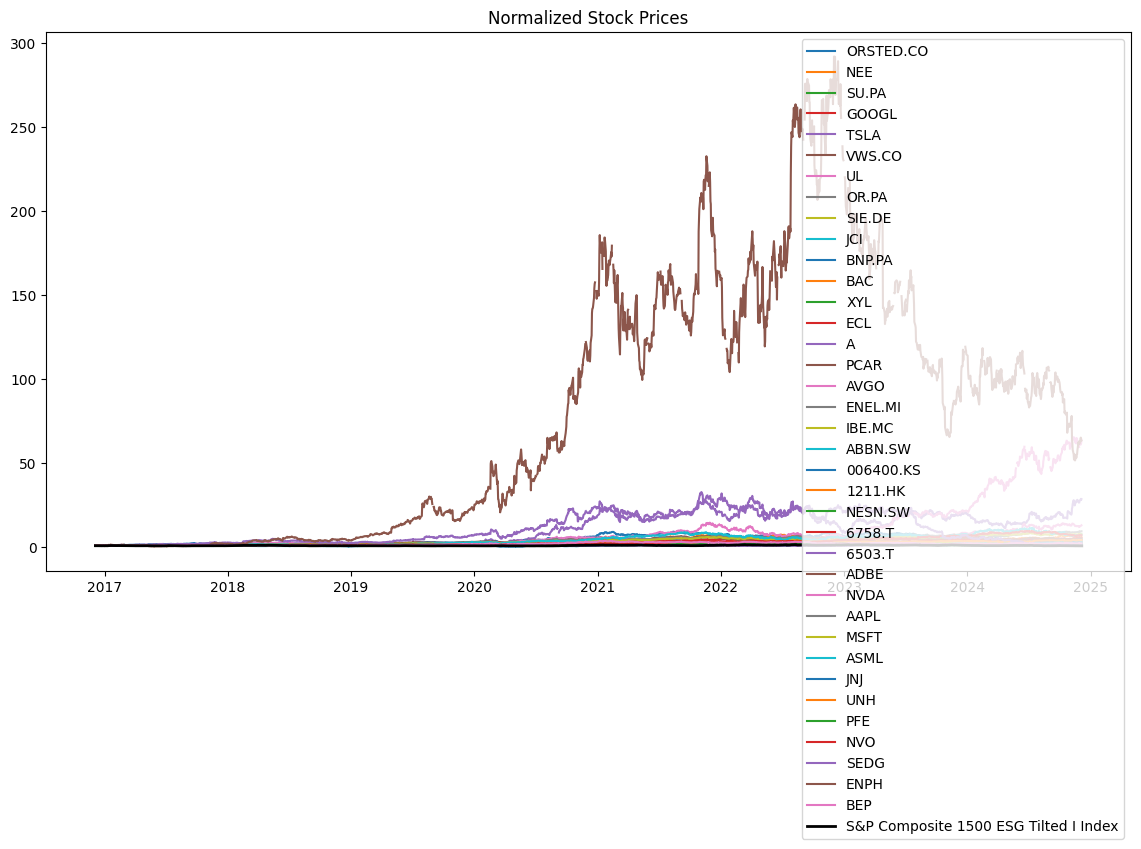

<ipython-input-12-9d606ce04c21>:54: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  daily_returns = stock_data.pct_change().fillna(method='ffill').dropna()
<ipython-input-12-9d606ce04c21>:54: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  daily_returns = stock_data.pct_change().fillna(method='ffill').dropna()
<ipython-input-12-9d606ce04c21>:57: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  benchmark_returns = benchmark_data.pct_change().fillna(method='ffill').dropna()
<ipython-input-12-9d606ce04c21>:58: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffil

Optimization terminated successfully    (Exit mode 0)
            Current function value: -1.8718440112337322
            Iterations: 14
            Function evaluations: 541
            Gradient evaluations: 14
Optimization terminated successfully    (Exit mode 0)
            Current function value: -0.79069459371897
            Iterations: 5
            Function evaluations: 190
            Gradient evaluations: 5


<ipython-input-12-9d606ce04c21>:114: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  results[2, i] = (returns - float(risk_free_rate)) / risk
<ipython-input-12-9d606ce04c21>:124: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  cml_y = float(riskfree_returns.mean()) + (sr_max_ret - float(riskfree_returns.mean())) / sr_max_risk * cml_x


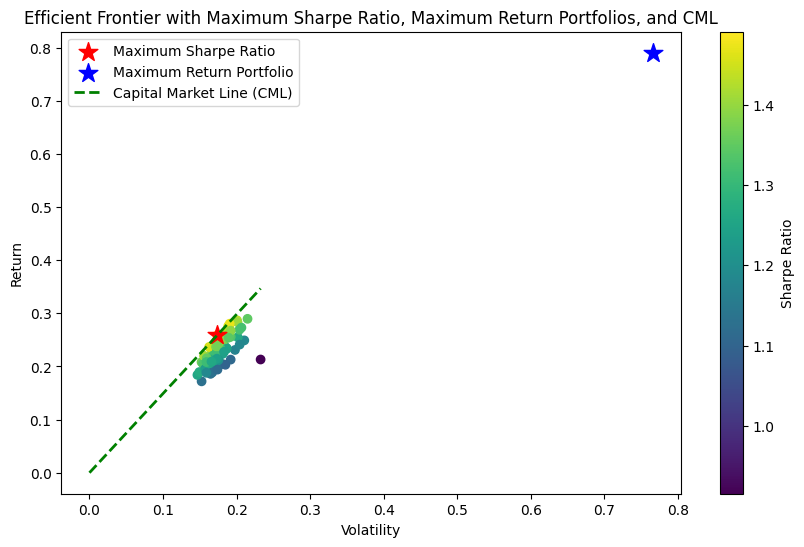

Optimal Portfolio Weights based on Sharpe Ratio:
ORSTED.CO    1.666940e-16
NEE          0.000000e+00
SU.PA        0.000000e+00
GOOGL        0.000000e+00
TSLA         4.823410e-02
VWS.CO       4.090537e-16
UL           0.000000e+00
OR.PA        0.000000e+00
SIE.DE       0.000000e+00
JCI          1.957618e-16
BNP.PA       1.964801e-16
BAC          4.562864e-16
XYL          0.000000e+00
ECL          4.596158e-16
A            0.000000e+00
PCAR         0.000000e+00
AVGO         0.000000e+00
ENEL.MI      0.000000e+00
IBE.MC       2.026884e-01
ABBN.SW      0.000000e+00
006400.KS    4.097350e-02
1211.HK      7.101428e-02
NESN.SW      0.000000e+00
6758.T       1.958099e-01
6503.T       0.000000e+00
ADBE         4.269555e-16
NVDA         1.255603e-01
AAPL         4.531992e-03
MSFT         0.000000e+00
ASML         8.791236e-16
JNJ          0.000000e+00
UNH          5.744735e-02
PFE          2.493166e-16
NVO          1.906107e-01
SEDG         3.417491e-15
ENPH         6.312950e-02
BEP          3.

<ipython-input-12-9d606ce04c21>:155: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  portfolio_sharpe_ratio = float((portfolio_return - riskfree_returns.mean()) / portfolio_volatility)
<ipython-input-12-9d606ce04c21>:165: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  max_return_sharpe_ratio = float((max_return_portfolio_return - riskfree_returns.mean()) / max_return_portfolio_volatility)


In [12]:

# Define stock tickers and benchmark
stocks = ['ORSTED.CO', 'NEE', 'SU.PA', 'GOOGL', 'TSLA', 'VWS.CO',
          'UL', 'OR.PA', 'SIE.DE', 'JCI', 'BNP.PA', 'BAC',
          'XYL', 'ECL', 'A', 'PCAR', 'AVGO',
          # Renewable Energy
          'ENEL.MI', 'IBE.MC',
          # Energy Efficiency & Technology
          'ABBN.SW', '006400.KS',
          # Electric Vehicles & Battery Storage
          '1211.HK',
          # Sustainable Consumer Brands
          'NESN.SW', '6758.T',
          # Low-Carbon Industrials
          '6503.T',
          # Additional Growth-Oriented and ESG Stocks
          'ADBE', 'NVDA', 'AAPL', 'MSFT', 'ASML',
          'JNJ', 'UNH', 'PFE', 'NVO',
          'SEDG', 'ENPH', 'BEP']
benchmark_ticker = 'ZM=F'  # S&P Composite 1500 ESG Tilted I Index
riskfree_ticker = '^IRX'  # 13 Week T-Bill as proxy for risk-free rate

# Download historical data (5 years)
start_date = '2016-12-05'
end_date = '2024-12-05'

# Fetching stock data
stock_data = yf.download(stocks, start=start_date, end=end_date)['Adj Close']

# Filter out stocks that do not have data starting from the beginning of the period
valid_stocks = [stock for stock in stocks if stock_data[stock].first_valid_index() and stock_data[stock].first_valid_index() <= pd.Timestamp(start_date)]
stock_data = stock_data[valid_stocks]

# Fetching benchmark data
benchmark_data = yf.download(benchmark_ticker, start=start_date, end=end_date)['Adj Close']

# Fetching risk-free rate data
riskfree_data = yf.download(riskfree_ticker, start=start_date, end=end_date)['Adj Close']
riskfree_data.index = pd.to_datetime(riskfree_data.index, errors='coerce')

# Normalizing Data (Stock Prices and Benchmark)
normalized_stocks = stock_data / stock_data.iloc[0]
normalized_benchmark = benchmark_data / benchmark_data.iloc[0]

# Plot Normalized Stock Returns
plt.figure(figsize=(14, 7))
for stock in stocks:
    plt.plot(normalized_stocks.index, normalized_stocks[stock], label=stock)
plt.plot(normalized_benchmark.index, normalized_benchmark, label='S&P Composite 1500 ESG Tilted I Index', color='black', linewidth=2)
plt.title('Normalized Stock Prices')
plt.legend()
plt.show()

# Calculate daily returns
daily_returns = stock_data.pct_change().fillna(method='ffill').dropna()

stocks = valid_stocks  # Update stocks list to match filtered valid stocks
benchmark_returns = benchmark_data.pct_change().fillna(method='ffill').dropna()
riskfree_returns = riskfree_data.pct_change().fillna(method='ffill').dropna() / 100

# Calculate annualized mean return based on daily returns
mean_returns = daily_returns.mean() * 252
cov_matrix = daily_returns.cov() * 252

# Calculate Sharpe Ratio for each stock
sharpe_ratios = (mean_returns - riskfree_returns.mean()) / daily_returns.std()

# Mean-Variance Optimization (Efficient Frontier)
def portfolio_annualized_performance(weights, mean_returns, cov_matrix):
    returns = np.sum(weights * mean_returns)
    std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return returns, std

def negative_sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate):
    p_ret, p_vol = portfolio_annualized_performance(weights, mean_returns, cov_matrix)
    return -(p_ret - risk_free_rate) / p_vol

# Constraints
def check_sum(weights):
    return np.sum(weights) - 1

# Initial Guess
num_assets = len(stocks)
init_guess = num_assets * [1. / num_assets,]

# Boundaries and Constraints
bounds = tuple((0, 1) for asset in range(num_assets))  # Long positions only
constraints = ({'type': 'eq', 'fun': check_sum})

# Optimization for Maximum Sharpe Ratio
opt_result = minimize(negative_sharpe_ratio, init_guess, args=(mean_returns, cov_matrix, riskfree_returns.mean()),
                      method='SLSQP', bounds=bounds, constraints=constraints, options={'disp': True})
optimal_weights = opt_result.x

# Optimization for Maximum Return
def negative_return(weights, mean_returns, cov_matrix):
    p_ret, _ = portfolio_annualized_performance(weights, mean_returns, cov_matrix)
    return -p_ret

opt_result_max_return = minimize(negative_return, init_guess, args=(mean_returns, cov_matrix),
                                 method='SLSQP', bounds=bounds, constraints=constraints, options={'disp': True})
max_return_weights = opt_result_max_return.x
max_return_portfolio_return, max_return_portfolio_volatility = portfolio_annualized_performance(max_return_weights, mean_returns, cov_matrix)

# Calculate Efficient Frontier
def efficient_frontier(mean_returns, cov_matrix, risk_free_rate, num_portfolios=100):
    results = np.zeros((3, num_portfolios))
    weights_record = []
    for i in range(num_portfolios):
        weights = np.random.dirichlet(np.ones(num_assets), size=1).flatten()
        weights_record.append(weights)
        returns, risk = portfolio_annualized_performance(weights, mean_returns, cov_matrix)
        results[0, i] = returns
        results[1, i] = risk
        results[2, i] = (returns - float(risk_free_rate)) / risk
    return results, weights_record

# Plot Efficient Frontier
results, weights = efficient_frontier(mean_returns, cov_matrix, riskfree_returns.mean())
max_sharpe_idx = np.argmax(results[2])
sr_max_ret, sr_max_risk = results[0, max_sharpe_idx], results[1, max_sharpe_idx]

# Calculate Capital Market Line (CML)
cml_x = np.linspace(0, max(results[1, :]), 100)
cml_y = float(riskfree_returns.mean()) + (sr_max_ret - float(riskfree_returns.mean())) / sr_max_risk * cml_x

plt.figure(figsize=(10, 6))
plt.scatter(results[1, :], results[0, :], c=results[2, :], cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.scatter(sr_max_risk, sr_max_ret, c='red', marker='*', s=200, label='Maximum Sharpe Ratio')
plt.scatter(max_return_portfolio_volatility, max_return_portfolio_return, c='blue', marker='*', s=200, label='Maximum Return Portfolio')
plt.plot(cml_x, cml_y, color='green', linestyle='--', linewidth=2, label='Capital Market Line (CML)')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.title('Efficient Frontier with Maximum Sharpe Ratio, Maximum Return Portfolios, and CML')
plt.legend()
plt.show()

# Value at Risk (VaR)
confidence_level = 0.95
days = 1
VaR = daily_returns.quantile(1 - confidence_level) * np.sqrt(days)

# Output Optimal Weights for Maximum Sharpe Ratio
portfolio_weights = pd.Series(optimal_weights, index=stocks)
print("Optimal Portfolio Weights based on Sharpe Ratio:")
print(portfolio_weights)

# Output Optimal Weights for Maximum Return
max_return_weights_series = pd.Series(max_return_weights, index=stocks)
print("\nOptimal Portfolio Weights for Maximum Return:")
print(max_return_weights_series)

# Calculate Sharpe Ratio for the Optimized Portfolio
portfolio_return, portfolio_volatility = portfolio_annualized_performance(optimal_weights, mean_returns, cov_matrix)
portfolio_sharpe_ratio = float((portfolio_return - riskfree_returns.mean()) / portfolio_volatility)

print(f"\nPortfolio Return (Max Sharpe Ratio): {portfolio_return:.2f}%")
print(f"Portfolio Volatility (Max Sharpe Ratio): {portfolio_volatility:.2f}%")
print(f"Portfolio Sharpe Ratio (Max Sharpe Ratio): {portfolio_sharpe_ratio:.2f}")

print(f"\nMaximum Return Portfolio Return: {max_return_portfolio_return:.2f}%")
print(f"Maximum Return Portfolio Volatility: {max_return_portfolio_volatility:.2f}%")

# Calculate Sharpe Ratio for Maximum Return Portfolio
max_return_sharpe_ratio = float((max_return_portfolio_return - riskfree_returns.mean()) / max_return_portfolio_volatility)
print(f"Maximum Return Portfolio Sharpe Ratio: {max_return_sharpe_ratio:.2f}")


[*********************100%***********************]  38 of 38 completed
<ipython-input-13-2a97b3390b94>:32: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  daily_returns = stock_data.pct_change().fillna(method='ffill').dropna()
<ipython-input-13-2a97b3390b94>:32: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  daily_returns = stock_data.pct_change().fillna(method='ffill').dropna()


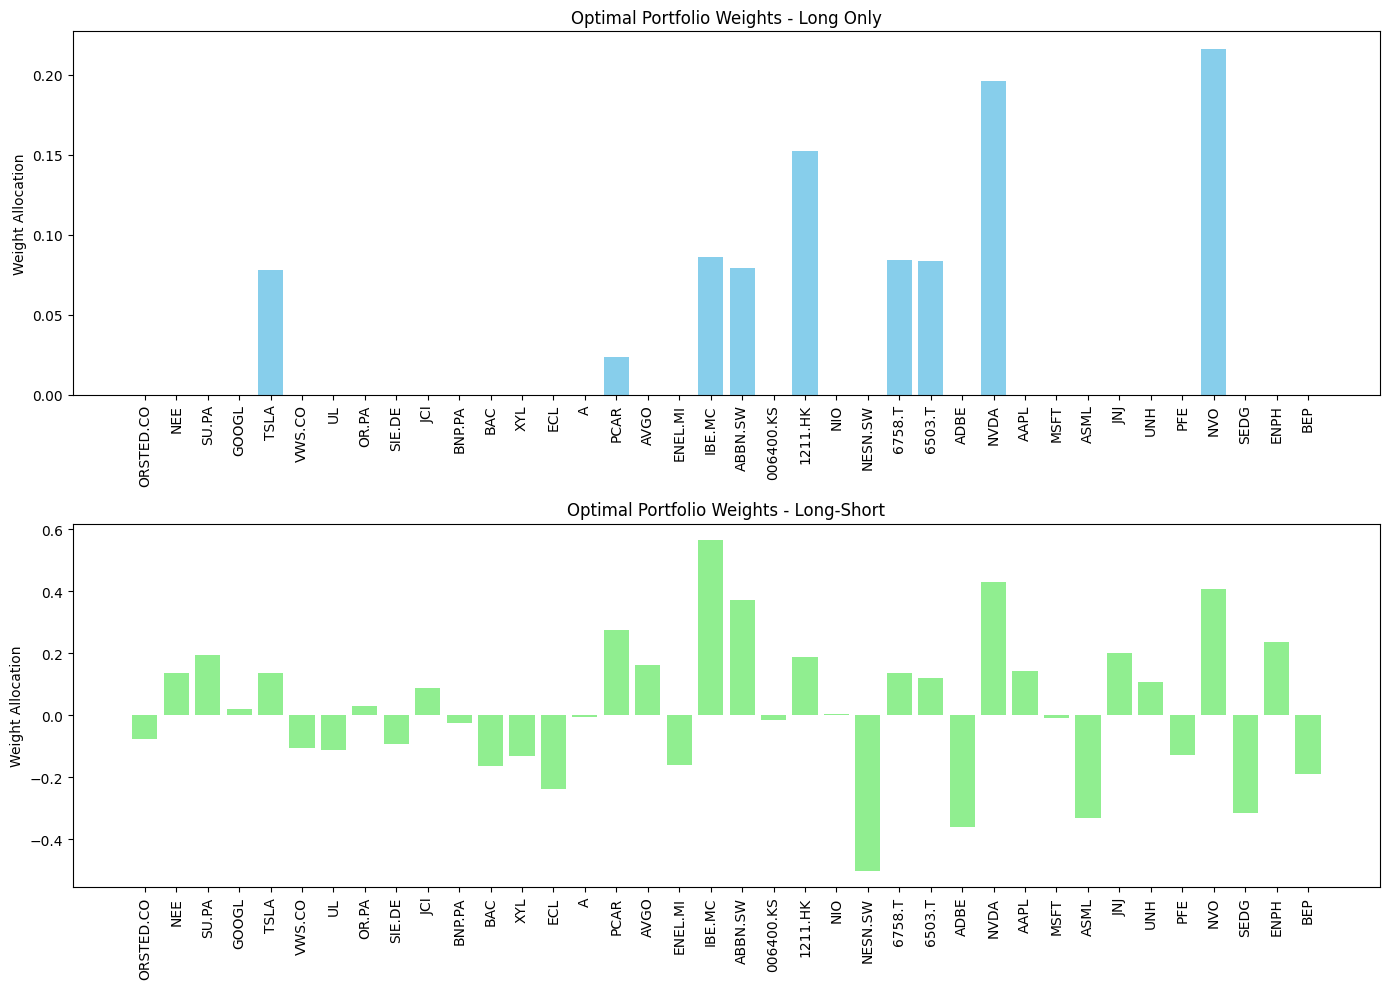

In [13]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Define stock tickers and benchmark
stocks = ['ORSTED.CO', 'NEE', 'SU.PA', 'GOOGL', 'TSLA', 'VWS.CO',
          'UL', 'OR.PA', 'SIE.DE', 'JCI', 'BNP.PA', 'BAC',
          'XYL', 'ECL', 'A', 'PCAR', 'AVGO',
          'ENEL.MI', 'IBE.MC',
          'ABBN.SW', '006400.KS',
          '1211.HK', 'NIO',
          'NESN.SW', '6758.T',
          '6503.T',
          'ADBE', 'NVDA', 'AAPL', 'MSFT', 'ASML',
          'JNJ', 'UNH', 'PFE', 'NVO',
          'SEDG', 'ENPH', 'BEP']

# Download historical data (5 years)
start_date = '2019-12-05'
end_date = '2024-12-05'

# Fetching stock data
stock_data = yf.download(stocks, start=start_date, end=end_date)['Adj Close']

# Filter out stocks that do not have data starting from the beginning of the period
valid_stocks = [stock for stock in stocks if stock_data[stock].first_valid_index() and stock_data[stock].first_valid_index() <= pd.Timestamp(start_date)]
stock_data = stock_data[valid_stocks]

# Calculate daily returns
daily_returns = stock_data.pct_change().fillna(method='ffill').dropna()

# Calculate annualized mean return and covariance matrix
mean_returns = daily_returns.mean() * 252
cov_matrix = daily_returns.cov() * 252

# Constraints
def check_sum(weights):
    return np.sum(weights) - 1

# Initial Guess
num_assets = len(valid_stocks)
init_guess = num_assets * [1. / num_assets,]

# Boundaries and Constraints for Long-Only Portfolio
bounds_long = tuple((0, 1) for asset in range(num_assets))  # Long positions only
constraints = ({'type': 'eq', 'fun': check_sum})

# Optimization for Maximum Sharpe Ratio - Long Only
riskfree_returns_mean = 0.005  # Assuming 0.5% risk-free rate for simplification
def negative_sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate):
    p_ret, p_vol = np.sum(weights * mean_returns), np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return -(p_ret - risk_free_rate) / p_vol

opt_result_long = minimize(negative_sharpe_ratio, init_guess, args=(mean_returns, cov_matrix, riskfree_returns_mean),
                           method='SLSQP', bounds=bounds_long, constraints=constraints)

optimal_weights_long = opt_result_long.x

# Boundaries and Constraints for Long-Short Portfolio
bounds_long_short = tuple((-0.5, 1) for asset in range(num_assets))  # Allow short selling up to 50%

# Optimization for Maximum Sharpe Ratio - Long Short
opt_result_long_short = minimize(negative_sharpe_ratio, init_guess, args=(mean_returns, cov_matrix, riskfree_returns_mean),
                                 method='SLSQP', bounds=bounds_long_short, constraints=constraints)

optimal_weights_long_short = opt_result_long_short.x

# Plotting the Weight Allocation for Long-Only and Long-Short Portfolios
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Long-Only Weights
axes[0].bar(valid_stocks, optimal_weights_long, color='skyblue')
axes[0].set_title('Optimal Portfolio Weights - Long Only')
axes[0].set_ylabel('Weight Allocation')
axes[0].tick_params(axis='x', rotation=90)

# Long-Short Weights
axes[1].bar(valid_stocks, optimal_weights_long_short, color='lightgreen')
axes[1].set_title('Optimal Portfolio Weights - Long-Short')
axes[1].set_ylabel('Weight Allocation')
axes[1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()
